### IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordtree
import matplotlib.image as mpimg
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.cm as cm  
from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric
import time

### DATA LOADING

In [2]:
df = pd.read_csv("Shona_Articles.csv")
df.head()

category                                           headline  \
0    sports             ‘Tagadzirira’ . . . bhora ngaritambwe.   
1    sports                    Nhabvu yevechidiki yosimudzirwa   
2    health  Nyanzvi dzeHutano Dzofara neKusashaya kweVanhu...   
3  business  Dambudziko Rekushaya Mari muMabhanga Roenderer...   
4  business  Kambani yeKwese TV Inopihwa Rezenisi Kuti Itep...   

                                                text  \
0    KUCHANGE kusingadanwe anonzwa svondo rino ku...   
1    SHASHA dzakambonetsa munhabvu – Godfrey ‘God...   
2  Bazi rezvehutano rakazivisa nemusi weChina kut...   
3  Nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...   
4  Sangano reZimbabwe Institute of Southern Afric...   

                                                 url  
0  https://www.kwayedza.co.zw/tagadzirira-bhora-n...  
1  https://www.kwayedza.co.zw/nhabvu-yevechidiki-...  
2  https://www.voashona.com/a/zimbabwe-covid-19-d...  
3  https://www.voashona.com/a/zimbabwe-politics-c...  
4  https://www.voashona.com/a/zimbabwe-mobile-gia...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    category  1288 non-null   object
 1   headline   1288 non-null   object
 2   text       1288 non-null   object
 3   url        1288 non-null   object
dtypes: object(4)
memory usage: 40.4+ KB


In [4]:
df[' category'].unique()

array(['sports', 'health', 'business', 'politics'], dtype=object)

In [5]:
# rename categories column to remove blank space before the label
df = df.rename(columns = {' category':'categories'},)

### EXPLORATORY DATA ANALYSIS

In [6]:
df['categories'].unique()

array(['sports', 'health', 'business', 'politics'], dtype=object)

In [7]:
# Check for duplicate records
df[df.duplicated()== True]

Empty DataFrame
Columns: [categories, headline, text, url]
Index: []

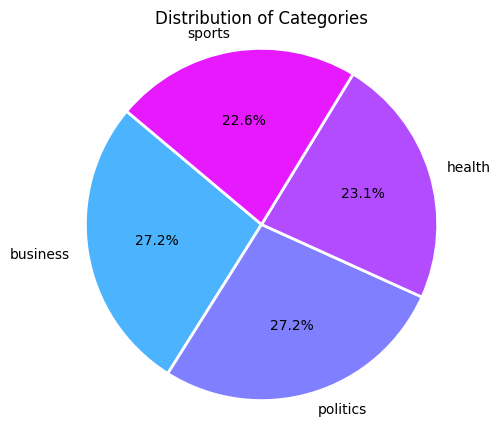

In [8]:
#class distribution
value_counts = df['categories'].value_counts()
import matplotlib.pyplot as plt
import numpy as np  # Needed for color gradient

# Generate blue shades using a colormap (adjust linspace for light/dark)
colors = plt.cm.cool(np.linspace(0.3, 0.9, len(value_counts)))

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    colors=colors  # Apply blue colors
)
plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

### PREPROCESSING

In [9]:
# drop url column
df = df.drop(['url'],axis = 1)

In [10]:
# convert text into lower case and drop duplicate columns
df['text1'] = df['text'].str.lower()
df['headline1']=df['headline'].str.lower()
df = df.drop(['text','headline'],axis = 1)
df.head()

categories                                              text1  \
0     sports    kuchange kusingadanwe anonzwa svondo rino ku...   
1     sports    shasha dzakambonetsa munhabvu – godfrey ‘god...   
2     health  bazi rezvehutano rakazivisa nemusi wechina kut...   
3   business  nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...   
4   business  sangano rezimbabwe institute of southern afric...   

                                           headline1  
0             ‘tagadzirira’ . . . bhora ngaritambwe.  
1                    nhabvu yevechidiki yosimudzirwa  
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...  
3  dambudziko rekushaya mari mumabhanga roenderer...  
4  kambani yekwese tv inopihwa rezenisi kuti itep...

In [11]:
import string
# Variable that contains all punctuations 
punctuation= string.punctuation

In [12]:
#Create a function to remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',punctuation))

In [13]:
#use lambda to call the function created above 
df['text1'] = df['text1'].apply(lambda x:remove_punc(x))
df['headline1'] = df['headline1'].apply(lambda x:remove_punc(x))
df.head()

categories                                              text1  \
0     sports    kuchange kusingadanwe anonzwa svondo rino ku...   
1     sports    shasha dzakambonetsa munhabvu – godfrey ‘god...   
2     health  bazi rezvehutano rakazivisa nemusi wechina kut...   
3   business  nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...   
4   business  sangano rezimbabwe institute of southern afric...   

                                           headline1  
0                 ‘tagadzirira’    bhora ngaritambwe  
1                    nhabvu yevechidiki yosimudzirwa  
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...  
3  dambudziko rekushaya mari mumabhanga roenderer...  
4  kambani yekwese tv inopihwa rezenisi kuti itep...

In [14]:
#remove stopwords
stopwords= pd.read_csv("stopwords.csv")
shona_stopwords= stopwords["Stopwords"].tolist()# convert csv with stopwords to list
shona_stopwords=[x.strip(' ') for x in shona_stopwords]# remove all leading and trailing white spaces using list comprehension
shona_stopwords

['asi',
 'vano',
 'kuti',
 'sezvo',
 'kuita',
 'ne',
 'che',
 'cha',
 'muma',
 'aya',
 'ma',
 'ro',
 'ichi',
 've',
 'nemu',
 'kana',
 'chi',
 'avo',
 'va',
 'vaka',
 'mu',
 'ona',
 'chi',
 'uyu',
 'we',
 'ra',
 'neva',
 've',
 'mwe',
 'zva',
 'izvi',
 'zvi',
 'rino',
 'muna',
 'uye',
 'yavo',
 'pa',
 'vano',
 'vari',
 'ku',
 'ti',
 're',
 'ino',
 'pasi',
 'vati',
 'mu',
 'wo',
 'nema',
 'ari',
 'iri',
 'zviri',
 'kuma',
 'ku',
 'vamwe',
 'pa',
 'neku',
 'asi',
 'mbo',
 'ya',
 'dze',
 'ma',
 'zvino',
 'chete',
 'vachi',
 'ri',
 'zve',
 'dzi',
 'dza',
 'dza',
 'ra',
 'rwa',
 'va',
 'ava',
 'of',
 'aka',
 'ano',
 'kwa',
 'kwe',
 'ta',
 'pe',
 'zvaka',
 'iyi',
 'zvi',
 'dzwa',
 'ye',
 'yeku',
 'yaka',
 'iyo',
 're',
 'sa',
 'i',
 'wa',
 'kwa',
 'ravo',
 'media',
 'source',
 'currently',
 'available',
 'unavailable',
 'vanoti',
 'apo',
 'nekuti',
 'anoti',
 'uyo',
 'saka',
 'iye',
 'anodaro',
 'isu']

In [15]:
def remove_shona_stopwords(text, shona_stopwords):
    words = text.split()  #splits the text into individual words
    cleaned_text = [word for word in words if word.lower() not in shona_stopwords]  # Remove stopwords
    return " ".join(cleaned_text)  # Join the cleaned words back into a single string

In [16]:
df['text1'] = df['text1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))# x as the input value
df['headline1'] = df['headline1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))
df.head(10)

categories                                              text1  \
0     sports  kuchange kusingadanwe anonzwa svondo kunhandar...   
1     sports  shasha dzakambonetsa munhabvu – godfrey ‘goda’...   
2     health  bazi rezvehutano rakazivisa nemusi wechina huw...   
3   business  nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...   
4   business  sangano rezimbabwe institute southern africazi...   
5   business  gavhuna wereserve bank zimbabwe vajohn mangudy...   
6     health  zimbabwe inoti ichange isingachabvumidze vanhu...   
7     sports  mutambi wemawarriors nevestri yekuiceland — si...   
8   politics  vanhu vakawanda vane tarisiro yekuti zvinhu zv...   
9   business  vazhinji vataura nestudio7 muchinhoyi nguva dz...   

                                           headline1  
0                    ‘tagadzirira’ bhora ngaritambwe  
1                    nhabvu yevechidiki yosimudzirwa  
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...  
3  dambudziko rekushaya mari mumabhanga roenderer...  
4  kambani yekwese tv inopihwa rezenisi itepfenyu...  
5  vamangudya vokurudzirwa kuzadzikisa zvavanotau...  
6  zimbabwe inovharwa kwemasvondo matatu kutanga ...  
7                            zim ine tarenda songani  
8  vakawanda munyika voisa tarisiro pahurumende i...  
9  kanzuru yechinhoyi yotsamwisa vatyairi vedzimo...

In [17]:
# remove special characters
import re
def remove_special_char(text):
    if not isinstance(text, str):
        return '' 
    text = re.sub('[^a-zA-Z0-9]', ' ',text)
    text = re.sub('\s+', ' ',text)#replace any additional spaces with a single space
    return text

In [18]:
df['text1'] = df['text1'].apply(lambda x: remove_special_char(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_special_char(x))
df.head(5)

categories                                              text1  \
0     sports  kuchange kusingadanwe anonzwa svondo kunhandar...   
1     sports  shasha dzakambonetsa munhabvu godfrey goda moy...   
2     health  bazi rezvehutano rakazivisa nemusi wechina huw...   
3   business  nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...   
4   business  sangano rezimbabwe institute southern africazi...   

                                           headline1  
0                      tagadzirira bhora ngaritambwe  
1                    nhabvu yevechidiki yosimudzirwa  
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...  
3  dambudziko rekushaya mari mumabhanga roenderer...  
4  kambani yekwese tv inopihwa rezenisi itepfenyu...

In [19]:
#remove any url
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+','',text)

In [20]:
df['text1'] = df['text1'].apply(lambda x: remove_url(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_url(x))


In [21]:
#remove any html tags that might be in the dataset
def remove_tags(text):
    return re.sub(r'<.*?>','',text)

In [22]:
df['text1'] = df['text1'].apply(lambda x: remove_tags(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_tags(x))


### Visualisation per category

##### Business Articles

In [23]:
df_business=df.loc[df['categories'] == 'business'] # create a new dataframe with business articles

text1= df_business['text1']

text1_rejoined=' '.join(str(x) for x in text1) #join individual tokens into strings


##### Word Cloud 

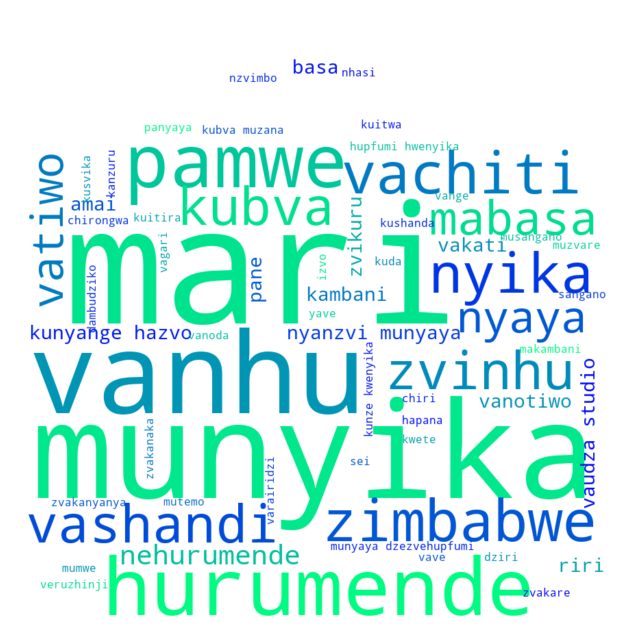

In [24]:
img = 'business.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='winter',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text1_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

In [25]:
##### Word Tree

  0%|          | 0/350 [00:00<?, ?it/s]

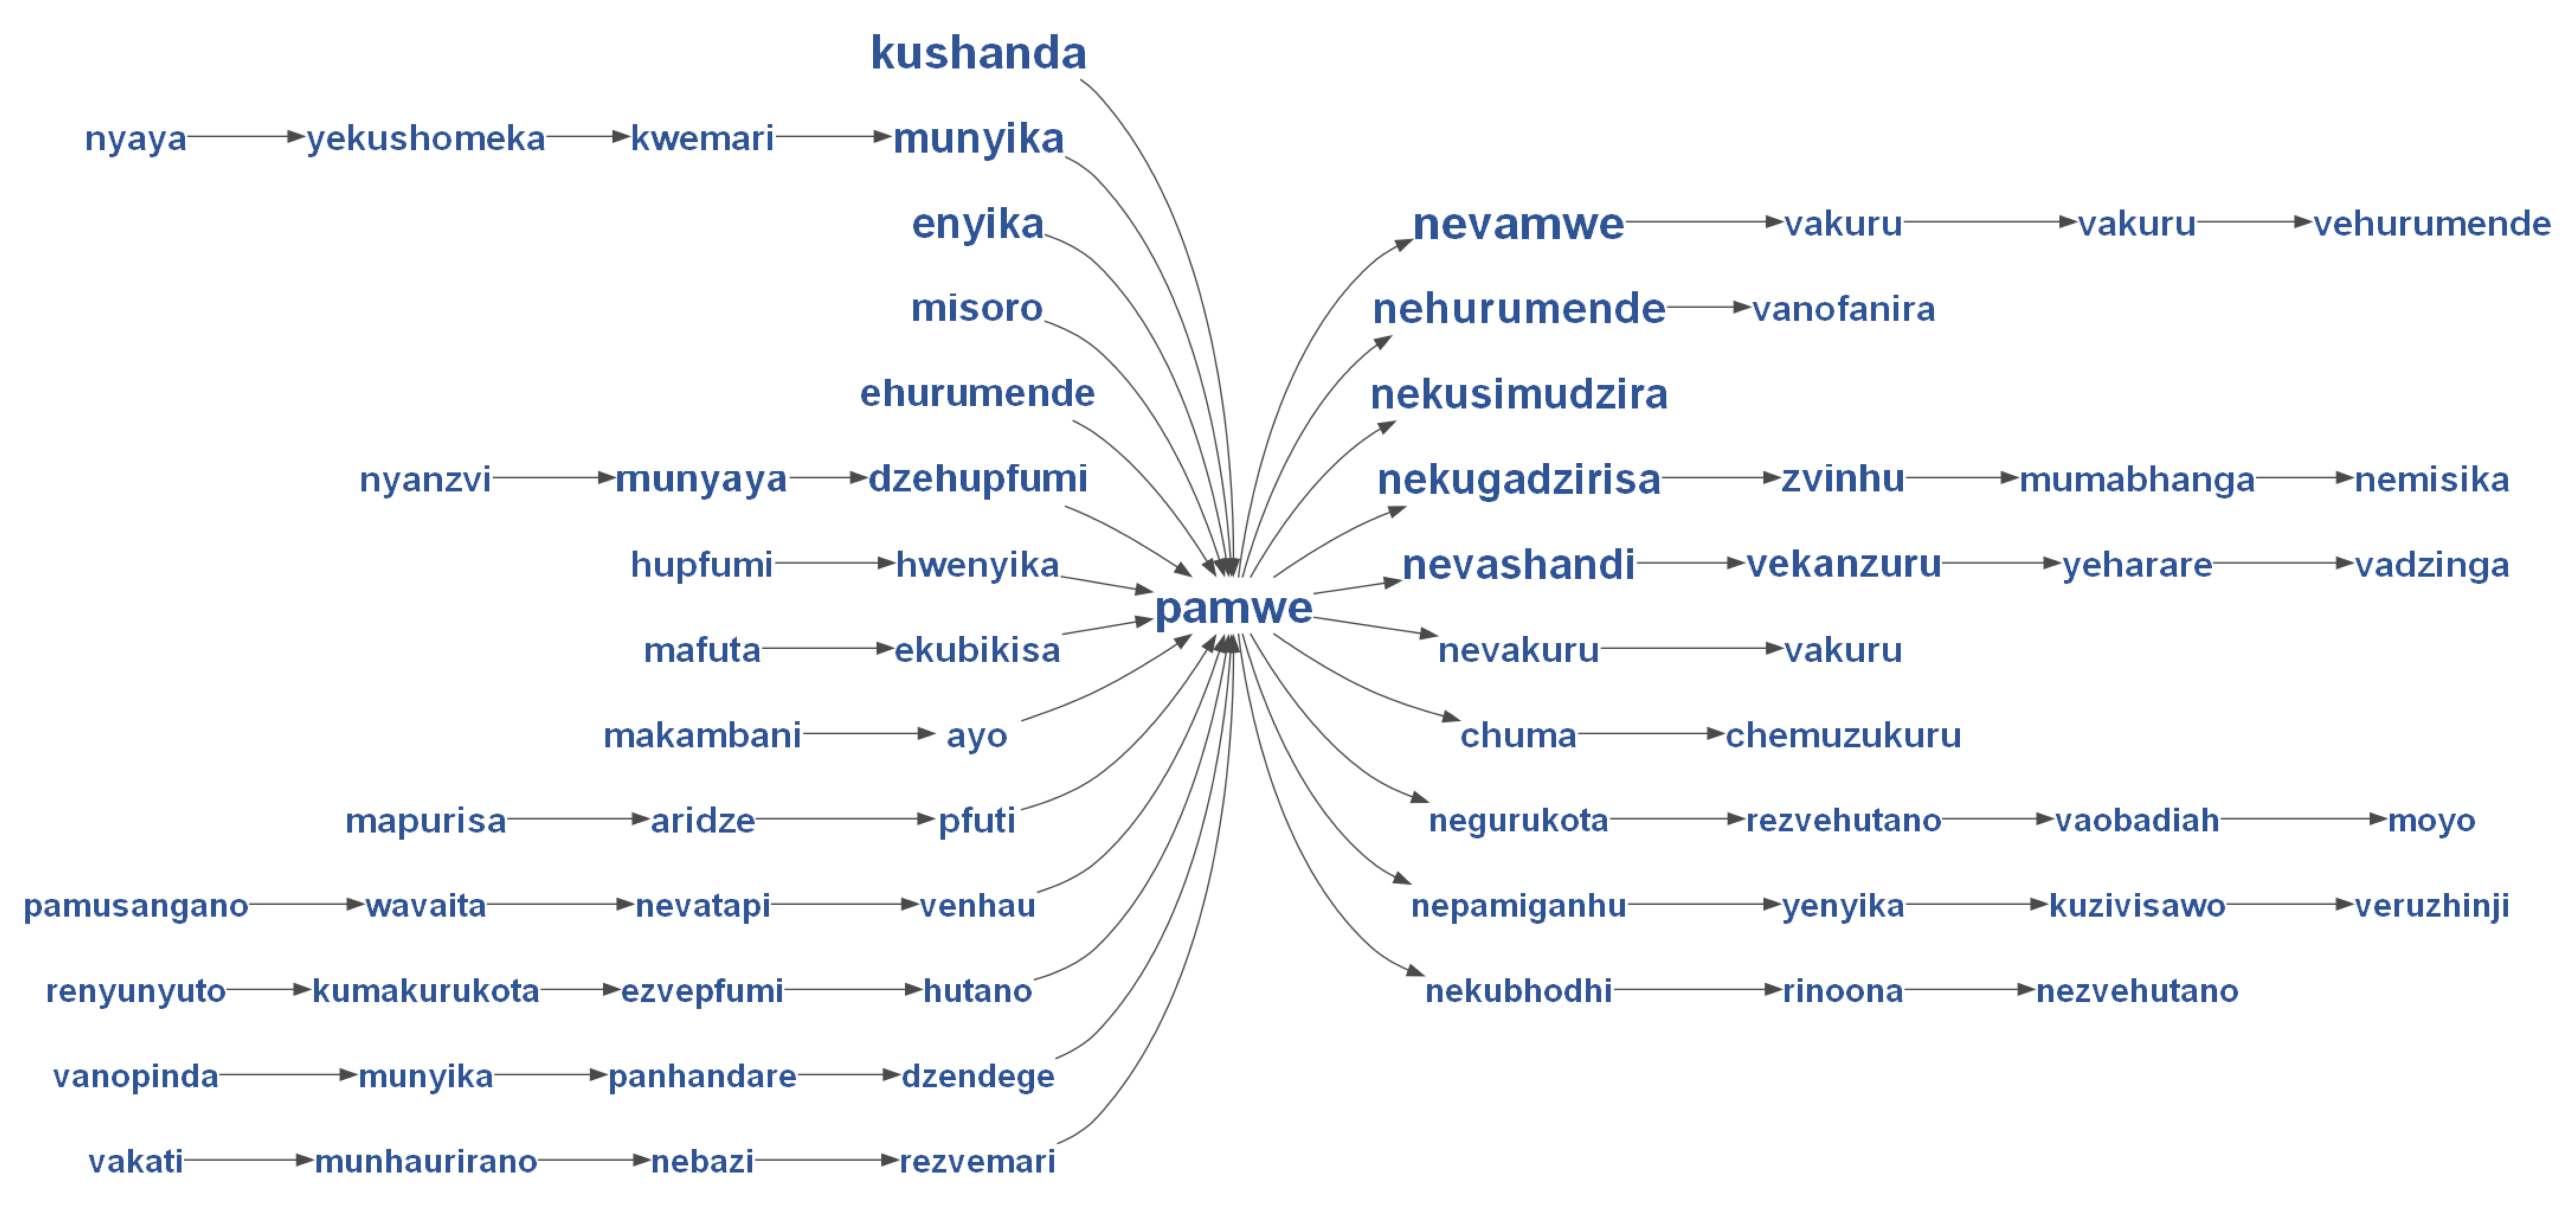

In [26]:
import wordtree, matplotlib.pyplot as plt, matplotlib.image as mpimg

# config
keyword = "pamwe"
g = wordtree.search_and_draw(
    corpus=text1,
    keyword=keyword,
    max_n=5,
    max_per_n=5,
    max_font_size=30,
    min_font_size=10
)
g.node_attr.update(
    fontcolor='#2F5496',
    fontname='Arial Bold',
    fontsize='30'
)
g.edge_attr.update(color='#4a4a4a')
g.render(filename='buz', format='png', cleanup=True)

# display hi-res image
plt.figure(figsize=(15,12), dpi=300)
img = mpimg.imread('buz.png')
plt.imshow(img)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('buz_final.png', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
#### Political Articles

In [28]:
df_politics=df.loc[df['categories'] == 'politics'] # create a new dataframe with political articles

text2= df_politics['text1']

text2_rejoined=' '.join(str(x) for x in text2) #join individual tokens into strings



In [29]:
##### WordCloud

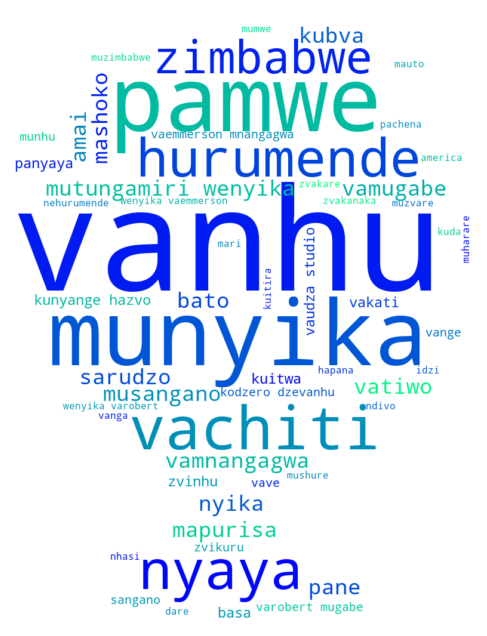

In [30]:
img = 'globe.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='winter',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text2_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

###### WordTree

  0%|          | 0/350 [00:00<?, ?it/s]

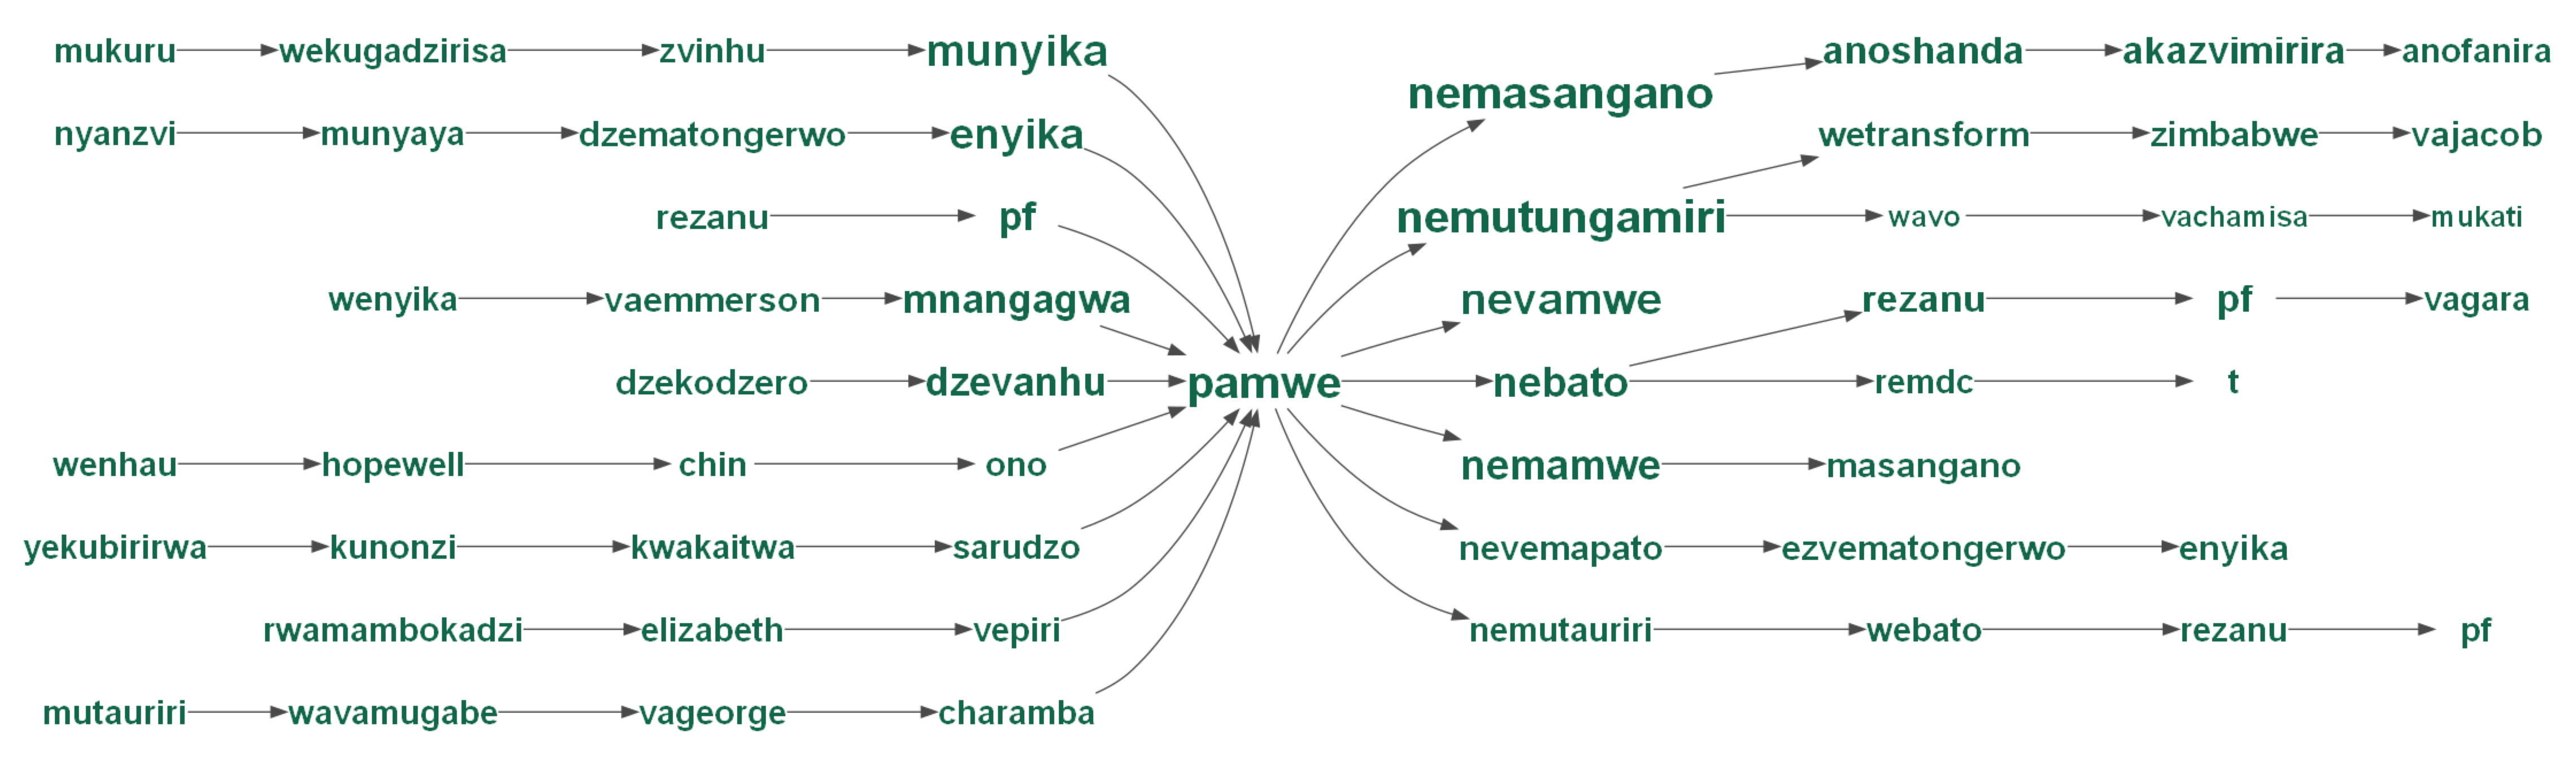

In [31]:
import wordtree, matplotlib.pyplot as plt, matplotlib.image as mpimg

# config
keyword = "pamwe"
g = wordtree.search_and_draw(
    corpus=text2,
    keyword=keyword,
    max_n=5,
    max_per_n=5,
    max_font_size=30,
    min_font_size=10
)
g.node_attr.update(
    fontcolor='#12674A',
    fontname='Arial Bold',
    fontsize='30'
)
g.edge_attr.update(color='#4a4a4a')
g.render(filename='pol', format='png', cleanup=True)

# display hi-res image
plt.figure(figsize=(15,12), dpi=300)
img = mpimg.imread('pol.png')
plt.imshow(img)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('pol_final.png', dpi=300, bbox_inches='tight')
plt.show()



#### Health Articles

In [32]:
df_health=df.loc[df['categories'] == 'health'] # create a new dataframe with health articles

text3= df_health['text1']

text3_rejoined=' '.join(str(x) for x in text3) #join individual tokens into strings
 

##### Word Cloud

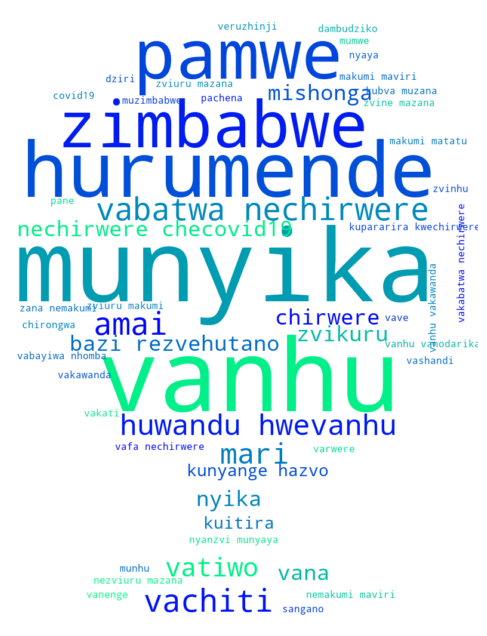

In [33]:
img = 'globe.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='winter',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text3_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

##### Word Tree

  0%|          | 0/297 [00:00<?, ?it/s]

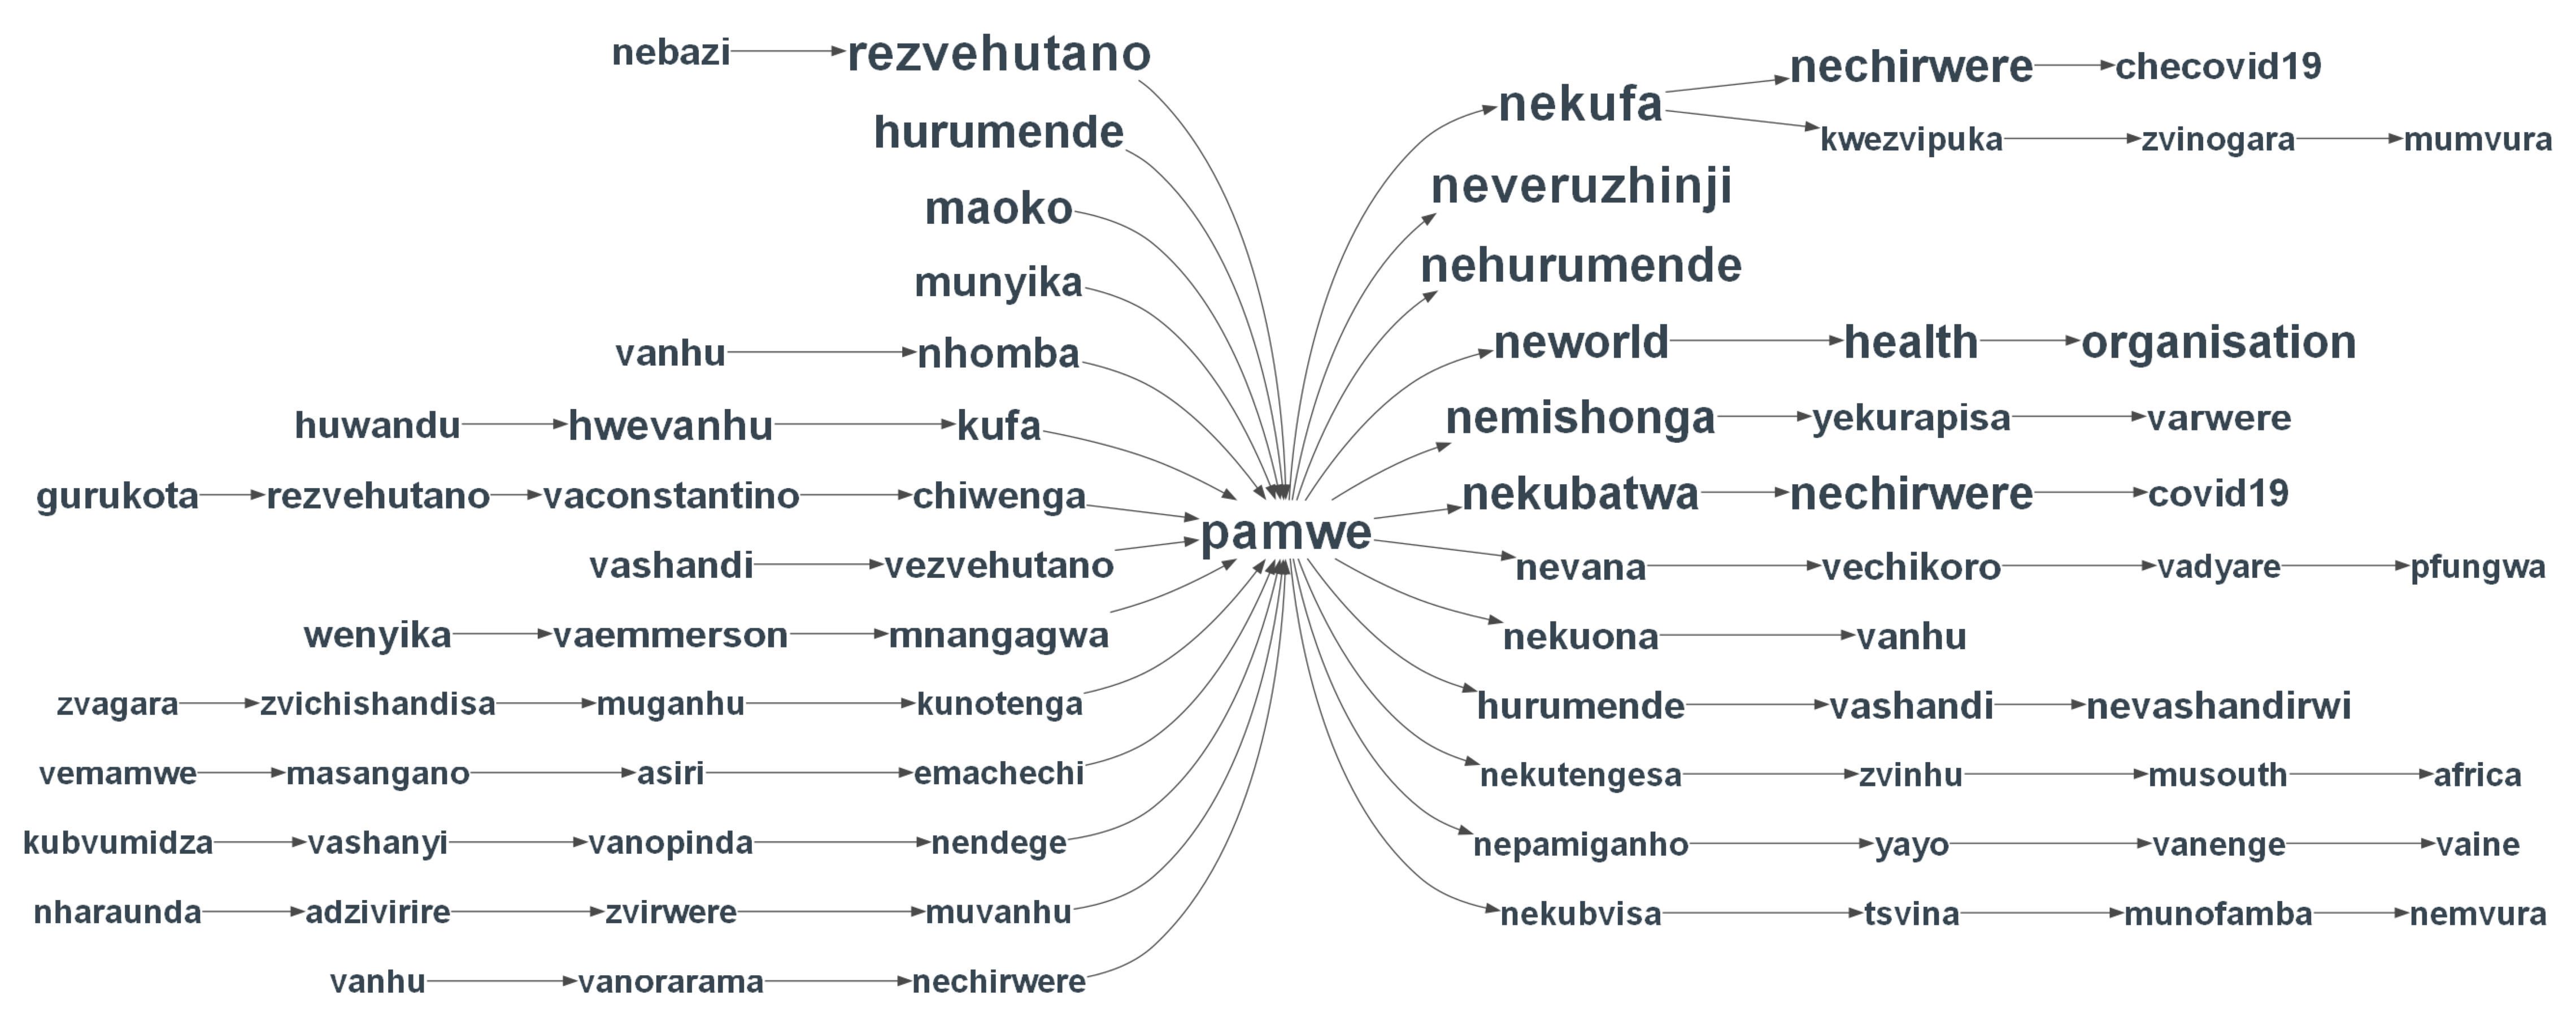

In [34]:

import wordtree, matplotlib.pyplot as plt, matplotlib.image as mpimg

# config
keyword = "pamwe"
g = wordtree.search_and_draw(
    corpus=text3,
    keyword=keyword,
    max_n=5,
    max_per_n=5,
    max_font_size=40,
    min_font_size=10
)
g.node_attr.update(
    fontcolor='#36454F',
    fontname='Arial Bold',
    fontsize='30'
)
g.edge_attr.update(color='#4a4a4a')
g.render(filename='hel', format='png', cleanup=True)

# display hi-res image
plt.figure(figsize=(15,12), dpi=300)
img = mpimg.imread('hel.png')
plt.imshow(img)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('hel_final.png', dpi=300, bbox_inches='tight')
plt.show()


#### Sports Articles

In [35]:
df_sports=df.loc[df['categories'] == 'sports'] # create a new dataframe with health articles

text4= df_sports['text1']

text4_rejoined=' '.join(str(x) for x in text4) #join individual tokens into strings



##### Wordcloud

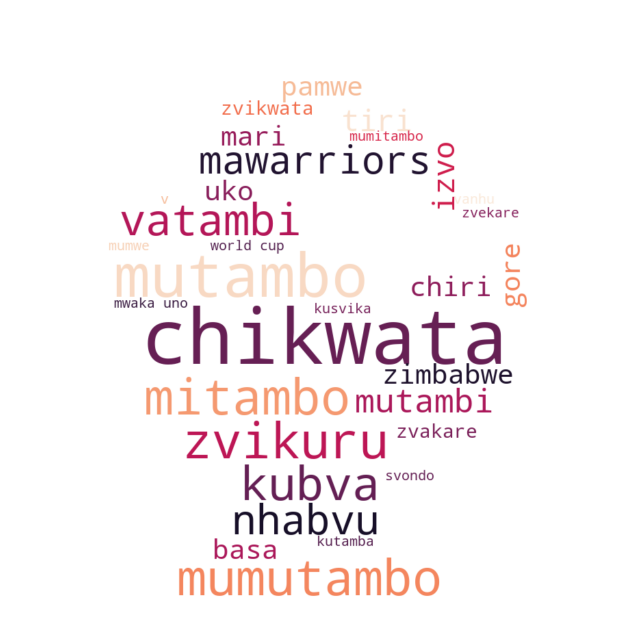

In [36]:
img = 'sport.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='rocket',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text4_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

##### Word Tree

  0%|          | 0/291 [00:00<?, ?it/s]

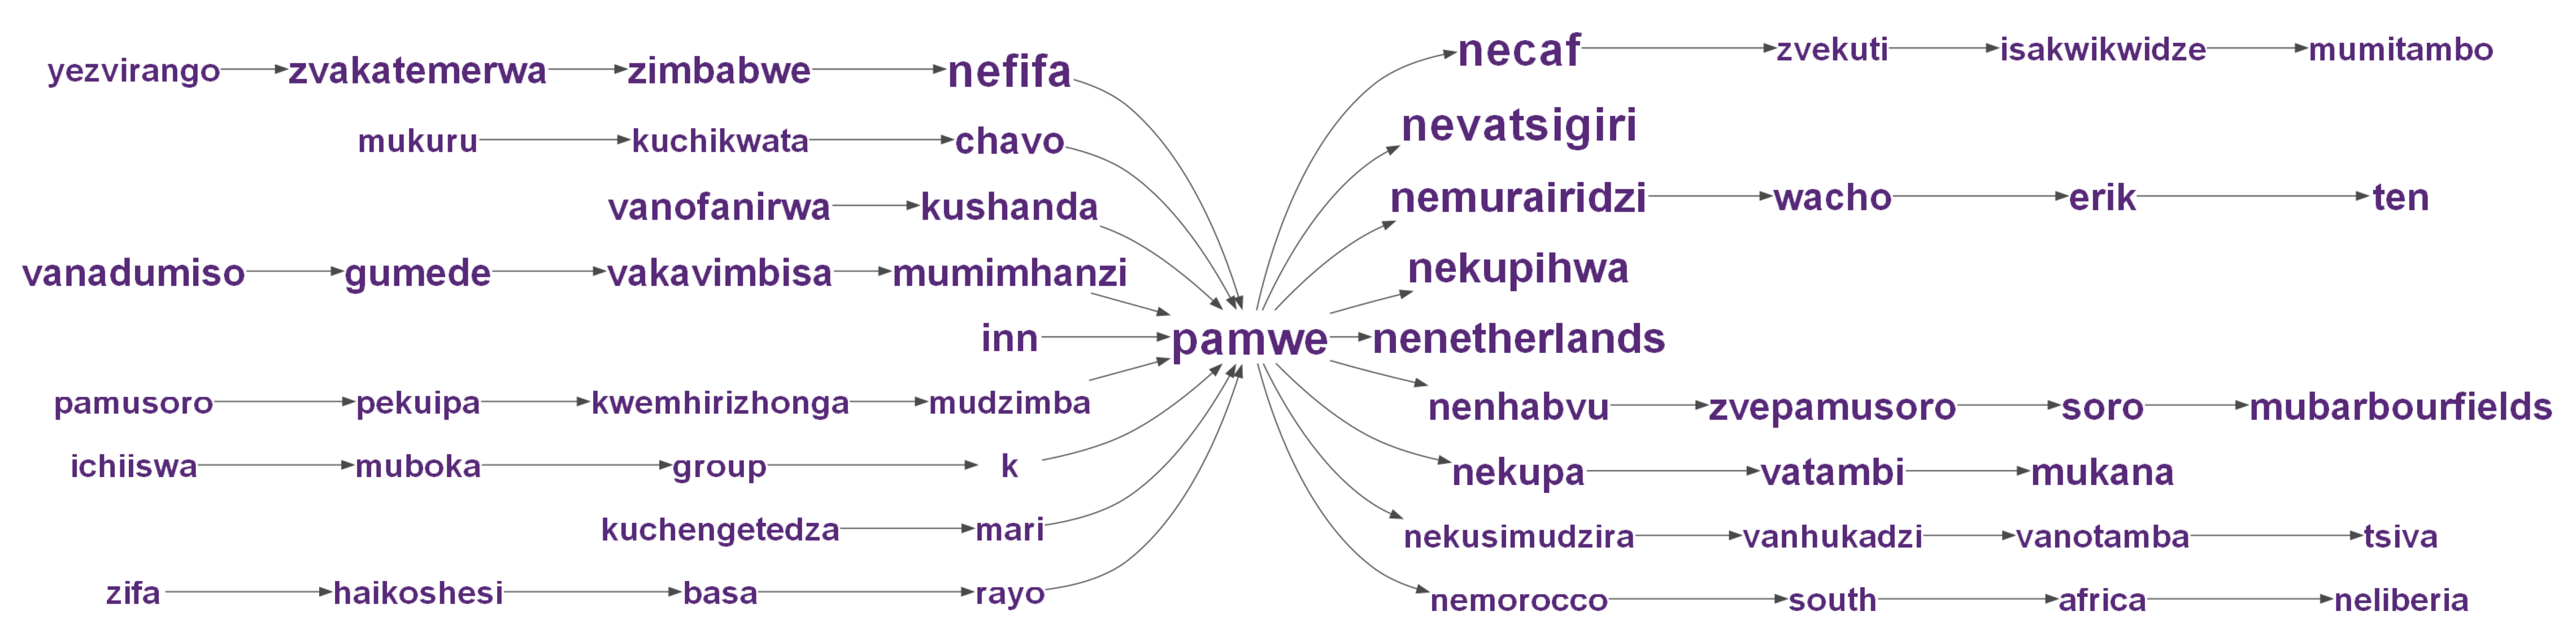

In [37]:
import wordtree, matplotlib.pyplot as plt, matplotlib.image as mpimg

# config
keyword = "pamwe"
g = wordtree.search_and_draw(
    corpus=text4,
    keyword=keyword,
    max_n=5,
    max_per_n=5,
    max_font_size=40,
    min_font_size=10
)
g.node_attr.update(
    fontcolor='#572978',
    fontname='Arial Bold',
    fontsize='30'
)
g.edge_attr.update(color='#4a4a4a')
g.render(filename='spo', format='png', cleanup=True)

# display hi-res image
plt.figure(figsize=(15,12), dpi=300)
img = mpimg.imread('spo.png')
plt.imshow(img)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('spo_final.png', dpi=300, bbox_inches='tight')
plt.show()



### FEATURE EXTRACTION

In [38]:
from transformers import AutoModel, AutoTokenizer
import torch
tokenizer="C:/Users/shami/OneDrive/Desktop/coding/10 epochs/tokenizer/ContrastedBantuBerta10"
tokenizer =AutoTokenizer.from_pretrained(tokenizer)#classification head
model_path="C:/Users/shami/OneDrive/Desktop/coding/10 epochs/model/ContrastedBantuBerta10"
model =AutoModel.from_pretrained(model_path)#classification head

In [39]:
df['tokenized_tcolumn'] = df['text1'].apply(lambda x: tokenizer(x, padding='max_length', max_length=512, truncation=True, return_tensors='pt'))
df['tokenized_hcolumn'] = df['headline1'].apply(lambda x: tokenizer(x, padding='max_length', max_length=512, truncation=True, return_tensors='pt'))
df.head()

categories                                              text1  \
0     sports  kuchange kusingadanwe anonzwa svondo kunhandar...   
1     sports  shasha dzakambonetsa munhabvu godfrey goda moy...   
2     health  bazi rezvehutano rakazivisa nemusi wechina huw...   
3   business  nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...   
4   business  sangano rezimbabwe institute southern africazi...   

                                           headline1  \
0                      tagadzirira bhora ngaritambwe   
1                    nhabvu yevechidiki yosimudzirwa   
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...   
3  dambudziko rekushaya mari mumabhanga roenderer...   
4  kambani yekwese tv inopihwa rezenisi itepfenyu...   

             tokenized_tcolumn            tokenized_hcolumn  
0  [input_ids, attention_mask]  [input_ids, attention_mask]  
1  [input_ids, attention_mask]  [input_ids, attention_mask]  
2  [input_ids, attention_mask]  [input_ids, attention_mask]  
3  [input_ids, attention_mask]  [input_ids, attention_mask]  
4  [input_ids, attention_mask]  [input_ids, attention_mask]

In [40]:
import torch

tokenized_inputs_headlines = df['tokenized_tcolumn'].tolist()
all_embeddings = []

# Pass the list of tokenized inputs to the model
for tokens in tokenized_inputs_headlines:
    with torch.no_grad():
        inputs = {'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']}
        output_headlines = model(**inputs)
        last_hidden_stateh = output_headlines.last_hidden_state

    embeddings = last_hidden_stateh.squeeze(0)  # Remove batch dimension (assuming batch size is 1)
    sequence_embedding = embeddings.mean(dim=0)  # Mean pooling

    all_embeddings.append(sequence_embedding.detach().numpy())


In [41]:
df['h_emb']=all_embeddings
df.head()

categories                                              text1  \
0     sports  kuchange kusingadanwe anonzwa svondo kunhandar...   
1     sports  shasha dzakambonetsa munhabvu godfrey goda moy...   
2     health  bazi rezvehutano rakazivisa nemusi wechina huw...   
3   business  nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...   
4   business  sangano rezimbabwe institute southern africazi...   

                                           headline1  \
0                      tagadzirira bhora ngaritambwe   
1                    nhabvu yevechidiki yosimudzirwa   
2  nyanzvi dzehutano dzofara nekusashaya kwevanhu...   
3  dambudziko rekushaya mari mumabhanga roenderer...   
4  kambani yekwese tv inopihwa rezenisi itepfenyu...   

             tokenized_tcolumn            tokenized_hcolumn  \
0  [input_ids, attention_mask]  [input_ids, attention_mask]   
1  [input_ids, attention_mask]  [input_ids, attention_mask]   
2  [input_ids, attention_mask]  [input_ids, attention_mask]   
3  [input_ids, attention_mask]  [input_ids, attention_mask]   
4  [input_ids, attention_mask]  [input_ids, attention_mask]   

                                               h_emb  
0  [0.22747444, -0.028461304, -0.6148318, -1.0475...  
1  [0.2217201, -0.033025913, -0.6131743, -1.05410...  
2  [0.59809864, 0.49797112, -0.6634412, 0.649557,...  
3  [0.48442504, 0.054750312, 0.96456885, 0.313177...  
4  [0.49140483, 0.058407478, 0.9526587, 0.3044486...

C:\Users\shami\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shami\AppData\Local\Temp\ipykernel_27080\907189760.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')


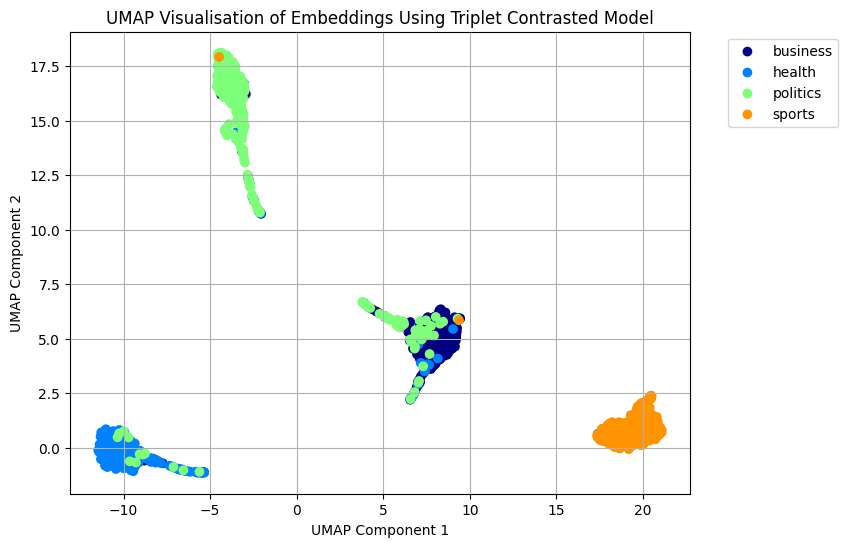

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import umap.umap_ as umap
# Assuming 'all_embeddings' is your high-dimensional data
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(all_embeddings)

plt.figure(figsize=(8, 6))
plt.grid()
c = 0
cmap = cm.get_cmap('jet')
for category in np.unique(df['categories']):
    idx = np.where(df['categories'] == category)
    plt.scatter(umap_results[idx, 0], umap_results[idx, 1], c=[cmap(c)]*len(idx[0]), label=category)
    c += 1 / len(np.unique(df['categories']))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualisation of Embeddings Using Triplet Contrasted Model")
plt.show()


### MODEL BUILDING

In [43]:
X = np.vstack(df['h_emb'].values)  # Stack lists into a 2D array

# Define your target variable 'y'
# Ensure 'y' is a NumPy array or pandas Series with the correct labels
y = df['categories'].values  # Replace 'target_column' with the actual column name for labels


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [45]:
X_train.shape, X_test.shape

((901, 768), (387, 768))

### Model Evaluation

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV


model_NB = GaussianNB()

calibrated_nb = CalibratedClassifierCV(model_NB, method='sigmoid', cv=5)
calibrated_nb.fit(X_train, y_train)


y_proba = calibrated_nb.predict_proba(X_test)

# Predictions
y_pred = calibrated_nb.predict(X_test)
y_proba = calibrated_nb.predict_proba(X_test)  # Confidence scores for each class

# Evaluation of the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    business       0.75      0.92      0.83        98
      health       0.93      0.92      0.92        85
    politics       0.92      0.76      0.83       115
      sports       1.00      0.99      0.99        89

    accuracy                           0.89       387
   macro avg       0.90      0.90      0.89       387
weighted avg       0.90      0.89      0.89       387



In [47]:
# Example of getting confidence scores
for i in range(5):  
    print(f"\nSample {i+1}:")
    print(f"Predicted class: {y_pred[i]}")
    print("Confidence scores:")
    for class_idx, prob in enumerate(y_proba[i]):
        print(f"  Class {class_idx}: {prob:.4f}")


confidence_scores = np.max(y_proba, axis=1)  # Confidence of predicted class
print("\nConfidence scores for predictions:")
print(confidence_scores[:5])  # First 5 confidence scores



Sample 1:
Predicted class: politics
Confidence scores:
  Class 0: 0.0628
  Class 1: 0.0353
  Class 2: 0.8917
  Class 3: 0.0102

Sample 2:
Predicted class: politics
Confidence scores:
  Class 0: 0.0628
  Class 1: 0.0353
  Class 2: 0.8917
  Class 3: 0.0102

Sample 3:
Predicted class: sports
Confidence scores:
  Class 0: 0.0523
  Class 1: 0.0294
  Class 2: 0.0634
  Class 3: 0.8548

Sample 4:
Predicted class: health
Confidence scores:
  Class 0: 0.0586
  Class 1: 0.8610
  Class 2: 0.0708
  Class 3: 0.0095

Sample 5:
Predicted class: politics
Confidence scores:
  Class 0: 0.0628
  Class 1: 0.0353
  Class 2: 0.8917
  Class 3: 0.0102

Confidence scores for predictions:
[0.89169494 0.89169494 0.85482409 0.86100536 0.89169494]


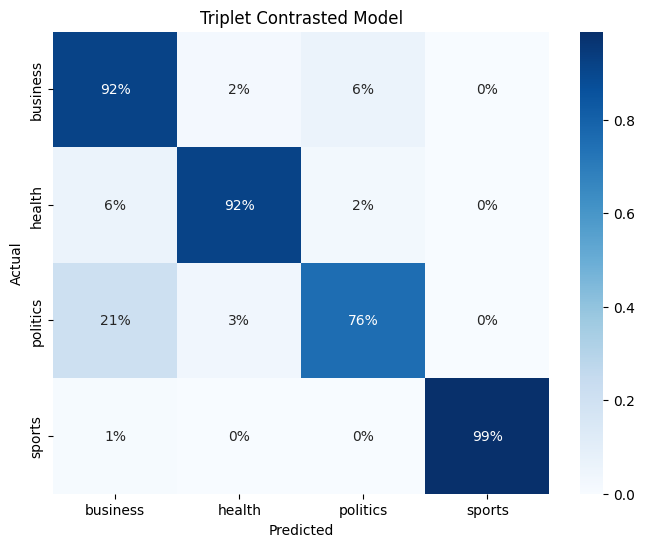

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cm = confusion_matrix(y_test, y_pred)
class_names = ['business', 'health', 'politics', 'sports']  


cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.0%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Triplet Contrasted Model')
plt.show()


In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, y)
print(f'Silhouette Score: {score:.3f}')


C:\Users\shami\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.670


In [50]:
import numpy as np

def intra_inter_class_distances(X, y):
   
    n = len(y)
    dist = 0
    count_intra = 0
    dist_inter = 0
    count_inter = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            d = np.linalg.norm(X[i] - X[j])
            if y[i] == y[j]:
                dist += d
                count_intra += 1
            else:
                dist_inter += d
                count_inter += 1
    
    avg_intra = dist / count_intra if count_intra else 0
    avg_inter = dist_inter / count_inter if count_inter else 0
    return avg_intra, avg_inter

avg_intra, avg_inter = intra_inter_class_distances(X, y)
print(f'Average Intra-Class Distance: {avg_intra:.3f}')
print(f'Average Inter-Class Distance: {avg_inter:.3f}')
print(f'Ratio (intra/inter): {avg_intra / avg_inter:.3f}')


Average Intra-Class Distance: 9.448
Average Inter-Class Distance: 38.659
Ratio (intra/inter): 0.244


In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

class EmbeddingGenerator(BaseEstimator, TransformerMixin):
    """Generates embeddings using your custom model and tokenizer"""
    def __init__(self, model_path, tokenizer_path, max_length=512):
        self.model_path = model_path
        self.tokenizer_path = tokenizer_path
        self.max_length = max_length
        self.tokenizer = None
        self.model = None
        
    def _load_components(self):
        """Lazy loading of tokenizer and model"""
        if self.tokenizer is None:
            self.tokenizer = AutoTokenizer.from_pretrained(self.tokenizer_path)
        if self.model is None:
            self.model = AutoModel.from_pretrained(self.model_path)
            self.model.eval()
    
    def fit(self, X, y=None):
        return self  # Nothing to fit
    
    def transform(self, X):
        self._load_components()
        if isinstance(X, pd.DataFrame):
            # Handle DataFrame input
            texts = X.iloc[:, 0].tolist()
        else:
            # Handle list/array input
            texts = X
            
        tokenized_inputs = [
            self.tokenizer(
                text, 
                padding='max_length',
                max_length=self.max_length,
                truncation=True,
                return_tensors='pt'
            )
            for text in texts
        ]
        
        all_embeddings = []
        for tokens in tokenized_inputs:
            with torch.no_grad():
                inputs = {
                    'input_ids': tokens['input_ids'],
                    'attention_mask': tokens['attention_mask']
                }
                outputs = self.model(**inputs)
                last_hidden_state = outputs.last_hidden_state
            
            # Process embeddings exactly as in your original code
            embeddings = last_hidden_state.squeeze(0)  # Remove batch dimension
            sequence_embedding = embeddings.mean(dim=0).detach().numpy()
            all_embeddings.append(sequence_embedding)
            
        return np.array(all_embeddings)


In [52]:

tokenizer_path = r"C:/Users/shami/OneDrive/Desktop/coding/10 epochs/tokenizer/ContrastedBantuBerta10"
model_path = r"C:/Users/shami/OneDrive/Desktop/coding/10 epochs/model/ContrastedBantuBerta10"


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import BaseEstimator, ClassifierMixin
class CalibratedClassifierPipeline(ClassifierMixin, BaseEstimator):
    def __init__(self, base_estimator, method='sigmoid', cv=5):
        self.base_estimator = base_estimator
        self.method = method
        self.cv = cv
        self.calibrated_classifier = None
        
    def fit(self, X, y):
        self.calibrated_classifier = CalibratedClassifierCV(
            self.base_estimator, method=self.method, cv=self.cv
        )
        self.calibrated_classifier.fit(X, y)
        return self
        
    def predict(self, X):
        return self.calibrated_classifier.predict(X)
        
    def predict_proba(self, X):
        return self.calibrated_classifier.predict_proba(X)
        
    def get_params(self, deep=True):
        return {
            'base_estimator': self.base_estimator,
            'method': self.method,
            'cv': self.cv
        }
        
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    @property
    def classes_(self):
        if hasattr(self.calibrated_classifier, 'classes_'):
            return self.calibrated_classifier.classes_
       
        if hasattr(self.base_estimator, 'classes_'):
            return self.base_estimator.classes_
        raise AttributeError("'CalibratedClassifierPipeline' object has no attribute 'classes_'")

In [54]:
# Create complete pipeline
text_clf = Pipeline([
    ('embeddings', EmbeddingGenerator(model_path, tokenizer_path)),
    ('classifier', CalibratedClassifierPipeline(
        base_estimator=GaussianNB(),
        method='sigmoid',
        cv=5
    ))
])


In [55]:
texts_train = df['text1'] 
labels_train = df['categories']  

# Train the pipeline
text_clf.fit(texts_train, labels_train)


Pipeline(steps=[('embeddings',
                 EmbeddingGenerator(model_path='C:/Users/shami/OneDrive/Desktop/coding/10 '
                                               'epochs/model/ContrastedBantuBerta10',
                                    tokenizer_path='C:/Users/shami/OneDrive/Desktop/coding/10 '
                                                   'epochs/tokenizer/ContrastedBantuBerta10')),
                ('classifier',
                 CalibratedClassifierPipeline(base_estimator=GaussianNB()))])

### MODEL SAVING

In [57]:
import pickle

pickle.dump(text_clf,open('shonanews11.pkl','wb'))#writebinary mode